In [1]:
import pandas as pd
Dataset = pd.read_csv('/content/drive/MyDrive/market basket analysis/basket_analysis.csv', index_col=0)
Dataset


,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
# Apply the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(Dataset, min_support=0.02, use_colnames=True)
# Display the frequent itemsets
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
5540,0.020020,"(Dill, Kidney Beans, Onion, Ice cream, Cheese,..."
5541,0.021021,"(Dill, Unicorn, chocolate, Kidney Beans, Onion..."
5542,0.020020,"(Sugar, chocolate, Kidney Beans, Ice cream, Ch..."
5543,0.020020,"(Corn, Yogurt, Unicorn, chocolate, Onion, Nutmeg)"


In [3]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.01, num_itemsets=len(frequent_itemsets))
# Calculate itemset size as a total number of items in both antecedents and consequents
rules['itemset_size'] = rules['antecedents'].apply(len) + rules['consequents'].apply(len)
# Display the association rules
rules.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,itemset_size
118314,"(Corn, Sugar, Kidney Beans)","(Cheese, Unicorn, Apple)",0.090090,0.075075,0.022022,0.244444,3.256000,1.0,0.015259,1.224165,0.761476,0.153846,0.183117,0.268889,6
118331,"(Cheese, Unicorn, Apple)","(Corn, Sugar, Kidney Beans)",0.075075,0.090090,0.022022,0.293333,3.256000,1.0,0.015259,1.287608,0.749115,0.153846,0.223366,0.268889,6
118190,"(Yogurt, Corn, Sugar)","(Unicorn, Bread, Apple)",0.085085,0.076076,0.020020,0.235294,3.092879,1.0,0.013547,1.208208,0.739606,0.141844,0.172328,0.249226,6
118207,"(Unicorn, Bread, Apple)","(Yogurt, Corn, Sugar)",0.076076,0.085085,0.020020,0.263158,3.092879,1.0,0.013547,1.241670,0.732394,0.141844,0.194633,0.249226,6
118936,"(Cheese, Dill, Unicorn)","(chocolate, Onion, Kidney Beans)",0.082082,0.083083,0.021021,0.256098,3.082427,1.0,0.014201,1.232577,0.735992,0.145833,0.188692,0.254555,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16265,(Eggs),"(Dill, Nutmeg, Butter)",0.384384,0.085085,0.033033,0.085938,1.010018,1.0,0.000328,1.000933,0.016112,0.075688,0.000932,0.237086,4
16258,"(Dill, Nutmeg, Butter)",(Eggs),0.085085,0.384384,0.033033,0.388235,1.010018,1.0,0.000328,1.006295,0.010841,0.075688,0.006255,0.237086,4
13324,(Eggs),"(chocolate, Onion, Bread)",0.384384,0.085085,0.033033,0.085938,1.010018,1.0,0.000328,1.000933,0.016112,0.075688,0.000932,0.237086,4
10140,"(Dill, Nutmeg, Butter)",(Bread),0.085085,0.384384,0.033033,0.388235,1.010018,1.0,0.000328,1.006295,0.010841,0.075688,0.006255,0.237086,4


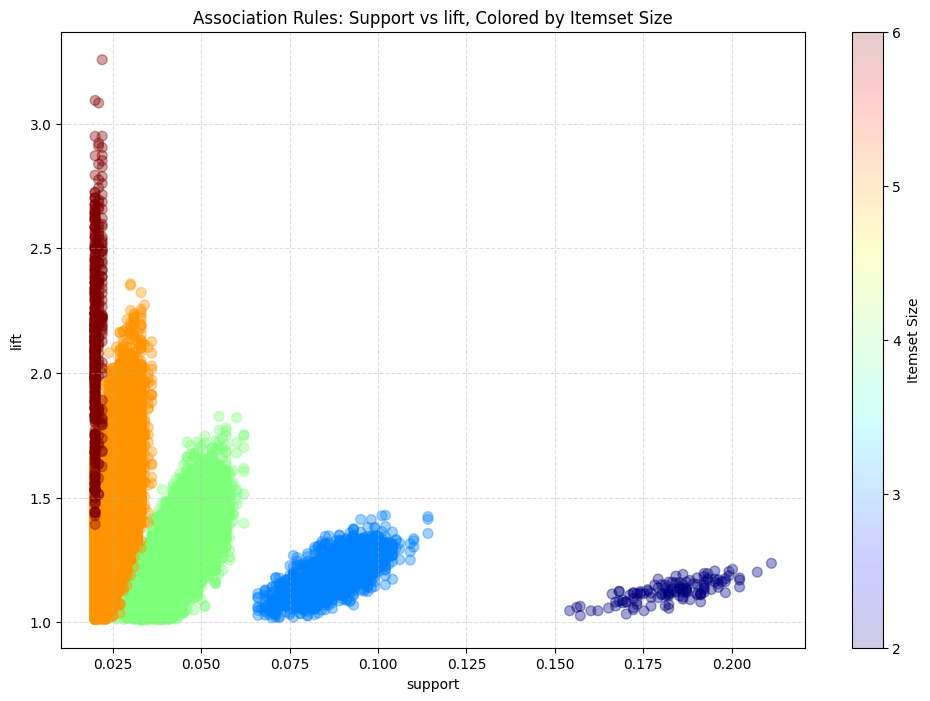

In [5]:
### Support vs Lift by Itemset Size
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualise the support against lift for the size of itemsets
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rules['support'],
    rules['lift'],
    c=rules['itemset_size'],  # Color based on itemset size
    cmap='jet',  # Color map
    alpha=0.2,  # Slight transparency
    s=50)  # Marker size

# Add color bar (legend) with intervals of 1
cbar = plt.colorbar(scatter, label='Itemset Size')
cbar.set_ticks(list(range(2, rules['itemset_size'].max() + 1)))

# Labels and title
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Association Rules: Support vs lift, Colored by Itemset Size')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.4)

# Show the plot
plt.show()


In [6]:
### Top itemset by Lift and Support

# Sort by itemset size, then by lift and support
rules_sorted = rules.sort_values(by=['itemset_size', 'lift', 'support'], ascending=[True, False, False])

# Group by itemset size and select the top itemset in each group
top_rules = rules_sorted.groupby('itemset_size').head(1).reset_index(drop=False)

# Display the filtered rules
top_rules


,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,itemset_size
0,206,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,1.0,0.040365,1.207857,0.321413,0.343089,0.172088,0.511088,2
1,1960,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,1.0,0.030628,1.407968,0.364570,0.213389,0.289757,0.414686,3
2,19490,"(Cheese, Dill)","(Kidney Beans, Onion)",0.177177,0.170170,0.055055,0.310734,1.826022,1.0,0.024905,1.203933,0.549768,0.188356,0.169389,0.317132,4
3,45365,"(Eggs, Unicorn, Apple)","(Corn, Sugar)",0.068068,0.187187,0.030030,0.441176,2.356873,1.0,0.017289,1.454507,0.617759,0.133333,0.312482,0.300802,5
4,118314,"(Corn, Sugar, Kidney Beans)","(Cheese, Unicorn, Apple)",0.090090,0.075075,0.022022,0.244444,3.256000,1.0,0.015259,1.224165,0.761476,0.153846,0.183117,0.268889,6


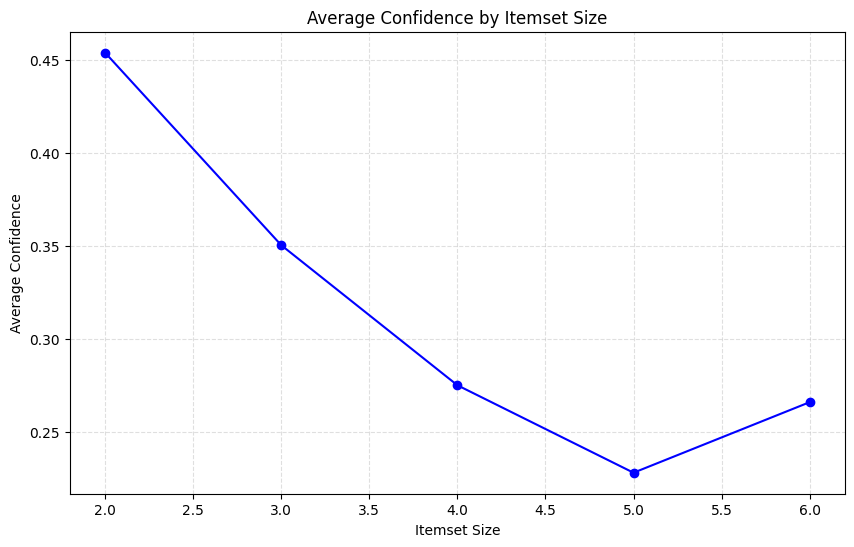

In [7]:
### Average Confidence by Itemset Size

# Group by itemset size and calculate average confidence for each group of item size
avg_confidence = rules.groupby('itemset_size')['confidence'].mean().reset_index()

# Create a line plot for Average Confidence by Itemset Size
plt.figure(figsize=(10, 6))
plt.plot(avg_confidence['itemset_size'], avg_confidence['confidence'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Itemset Size')
plt.ylabel('Average Confidence')
plt.title('Average Confidence by Itemset Size')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.4)

# Show the plot
plt.show()
